In [1]:
import pandas as pd
import seaborn as sns

In [2]:
lcn=pd.read_csv('D:\Imarticus Learning\DATASETS\LungCapData.csv')

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [5]:
lcn.Smoke.replace({'no':0 , 'yes':1} , inplace= True)
lcn.Gender.replace({'male':0 , 'female':1} , inplace= True)
lcn.Caesarean.replace({'no':0 , 'yes':1} , inplace= True)

In [6]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
lcn_train, lcn_test=train_test_split(lcn,test_size=.2)

In [8]:
train_lcn_x=lcn_train.iloc[:,1:]
train_lcn_y=lcn_train.iloc[:,0]

In [9]:
test_lcn_x=lcn_test.iloc[:,1:]
test_lcn_y=lcn_test.iloc[:,0]

In [10]:
#import a required functuion from sklearn
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_lcn_x,train_lcn_y)

LinearRegression()

In [11]:
Rsquare=linreg.score(train_lcn_x,train_lcn_y)
# Rsquare

In [12]:
Rsquare

0.8542092371078319

In [13]:
N=train_lcn_x.shape[0]
K=train_lcn_x.shape[1]
Adj_Rsqu=1-(1-Rsquare)*(N-1)/(N-K-1)

In [14]:
Adj_Rsqu

0.8529392827272382

In [15]:
linreg.coef_

array([ 0.16244238,  0.26335775, -0.57480985, -0.36983378, -0.18589551])

In [16]:
linreg.intercept_

-10.929631601761141

In [17]:
train_lcn_x.head(2)

,Age,Height,Smoke,Gender,Caesarean
78,17,70.4,0,1,0
499,13,64.1,0,0,0


In [18]:
pred_train=linreg.predict(train_lcn_x)
pred_test=linreg.predict(test_lcn_x)

In [19]:
pred_train

array([10.00244088,  8.0633513 , 11.87356333, 11.24907777,  2.39094065,
        4.39359249,  9.87609207,  8.59449453,  8.12374538,  3.48777559,
        9.02358947, 11.60851101,  7.81059871,  7.95282761,  6.85167505,
        6.52146023,  6.90359374,  5.73983026,  3.25559351, 10.96066664,
       10.71793454,  9.5854962 ,  5.96398122,  7.26442259,  9.16790878,
        7.6890898 ,  5.96840895,  7.39167374,  7.15389889, 11.49431246,
       10.09563373, 12.09141042,  4.36282899,  5.87037621,  6.32784218,
        2.78000446,  9.23960574, 10.00701808,  2.7871102 , 11.60562837,
        9.78860935,  5.44169344,  7.53107514,  3.14162553, 10.95011663,
        6.24039157,  6.14503684,  8.38113032,  8.16272159,  6.47434933,
        7.06588664,  9.29685449,  8.9649451 , 10.27037584,  9.15485618,
        7.71388048,  4.87978671, 11.18868369,  3.43664913,  5.48108181,
        7.51006944,  5.51184531,  4.21366979,  8.92800416,  3.41803588,
        9.28959928, 10.95760858,  7.98609369,  5.40090946,  7.27

In [20]:
pred_test

array([ 7.22325855,  9.09816907,  9.69654943,  8.61084193,  5.70505119,
        6.67350207,  2.1583464 ,  9.69174164,  7.04930866,  8.23730119,
        8.0633513 ,  5.02489824,  9.44496187, 10.38862206,  6.64451423,
        5.59970809,  3.64579025,  6.43030265,  6.37075594,  6.19654337,
        3.29521246,  4.66024505,  6.13085132,  8.01067975,  7.28190291,
        7.44764009,  6.52588795,  8.05737849, 11.39494217,  8.19832498,
        3.97664782, 11.55738455, 10.4968478 ,  6.97802386,  9.24755885,
        5.75329502,  8.62412511,  3.92840399,  5.80153884,  6.99663711,
        7.24138161,  4.47589462,  9.39671805, 10.75289519, 12.34591272,
        8.16601639,  6.7244239 ,  4.31015744,  4.79748458,  3.2522987 ,
       10.55991989, 10.71463974,  1.99590402, 10.10006145,  9.74793858,
        9.46975256, 11.71982692,  8.75137626,  3.00397384,  3.40055556,
        8.22136595, 11.718694  ,  6.83419473,  6.03008543,  9.18288652,
       10.55662508,  9.31173791,  6.39953915,  7.94472502, 10.53

In [21]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = test_lcn_y
actual_pred['Pred'] = pred_test

In [22]:
actual_pred

,Actual,Pred
225,7.275,7.223259
443,8.300,9.098169
618,9.175,9.696549
258,9.950,8.610842
700,6.600,5.705051
...,...,...
472,10.650,9.169454
380,5.850,7.505872
169,4.325,4.246183
174,9.175,10.555492


In [23]:
error_test=actual_pred['Actual']-actual_pred['Pred']

In [24]:
error_test

225    0.051741
443   -0.798169
618   -0.521549
258    1.339158
700    0.894949
         ...   
472    1.480546
380   -1.655872
169    0.078817
174   -1.380492
678    0.371351
Length: 145, dtype: float64

In [25]:
import numpy as np

In [26]:
mse_test=np.mean(np.square(error_test))

In [27]:
mse_test

1.0910495659874595

In [28]:
rmse_test=np.sqrt(mse_test)
rmse_test

1.044533180893484

In [29]:
#MAPE
mape_test=np.mean(np.abs(error_test*100/actual_pred['Actual']))
mape_test

13.535330127409534

In [30]:
mae=np.mean(np.abs(error_test))
mae

0.8473115024497784

In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [32]:
mean_absolute_error(actual_pred['Actual'],actual_pred['Pred'])

0.8473115024497784

In [33]:
mean_absolute_percentage_error(actual_pred['Actual'],actual_pred['Pred'])*100

13.535330127409532

In [34]:
mean_squared_error(actual_pred['Actual'],actual_pred['Pred'])

1.0910495659874595

In [35]:
# checking the asumptions

In [36]:
err_train=train_lcn_y-pred_train
err_train

78     0.047559
499   -0.163351
607   -1.048563
328   -1.624078
568   -1.065941
         ...   
162    1.099288
572    0.778004
71    -0.224336
416   -0.111839
660    0.542257
Name: LungCap, Length: 580, dtype: float64

In [37]:
err_train.mean() # mean should be 0

1.571156997607463e-15

In [38]:
err_train.skew()

-0.12184229771108843

In [39]:
err_train.kurtosis()+3

2.7740458830300536

In [40]:
import matplotlib.pyplot as plt
import seaborn as ans

(array([ 1.,  0.,  0.,  2.,  3.,  6.,  8.,  6., 16., 16., 22., 32., 32.,
        38., 40., 38., 40., 57., 41., 41., 38., 23., 25., 17., 17.,  7.,
         8.,  3.,  1.,  2.]),
 array([-3.33721838, -3.13422751, -2.93123665, -2.72824578, -2.52525491,
        -2.32226405, -2.11927318, -1.91628232, -1.71329145, -1.51030059,
        -1.30730972, -1.10431886, -0.90132799, -0.69833713, -0.49534626,
        -0.2923554 , -0.08936453,  0.11362634,  0.3166172 ,  0.51960807,
         0.72259893,  0.9255898 ,  1.12858066,  1.33157153,  1.53456239,
         1.73755326,  1.94054412,  2.14353499,  2.34652585,  2.54951672,
         2.75250759]),
 <BarContainer object of 30 artists>)

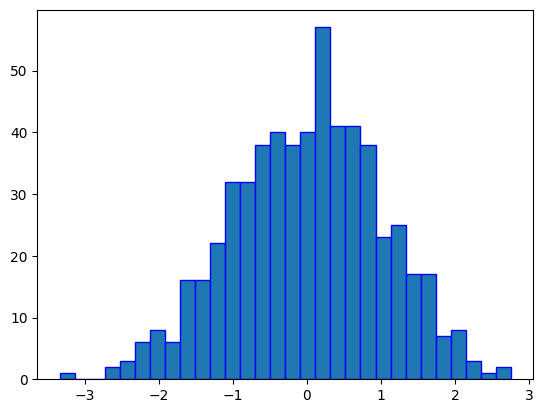

In [41]:
plt.hist(err_train,bins=30,edgecolor='blue')

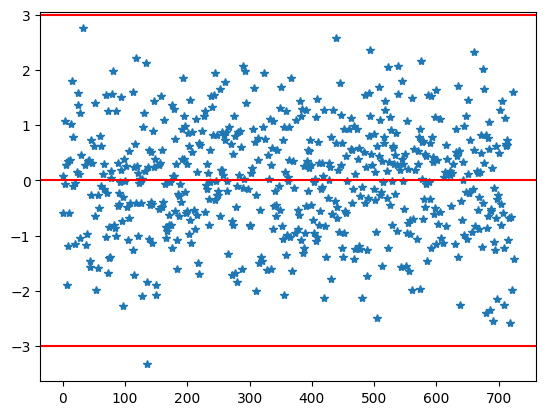

In [42]:
plt.plot(err_train,'*') # scatter plot errors
plt.axhline(y=0,color='red')
plt.axhline(y=3,color='red')
plt.axhline(y=-3,color='red')

In [43]:
#sns.boxplot(err_train)

In [44]:
actual_pred_train = pd.DataFrame()
actual_pred_train['Actual'] = train_lcn_y
actual_pred_train['Pred'] = pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

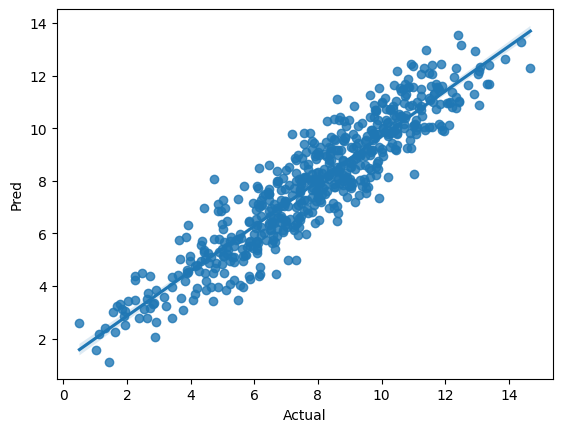

In [45]:
sns.regplot(x='Actual',y='Pred',data=actual_pred_train)

In [46]:
# some extra 
lcn.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [47]:
def predict_lcn():
    Age=input('Enter the age in years -->')
    Height=input('Enter the Heights in inches -->')
    Smoke=input('0 for no and 1 for yes  -->')
    Gender=input('0 for male and 1 for female -->')
    Caesarean=input('0 for no and 1 for yes -->')
    global df
    df=pd.DataFrame()
    df['Age']=[Age]
    df['Height']=[Height]
    df['Smoke']=[Smoke]
    df['Gender']=[Gender]
    df['Caesarean']=[Caesarean]
    pred=linreg.predict(df)
    print("-----------------------")
    print('Prediction',pred)

In [48]:
predict_lcn()

Enter the age in years -->23
Enter the Heights in inches -->100
0 for no and 1 for yes  -->1
0 for male and 1 for female -->1
0 for no and 1 for yes -->1
-----------------------
Prediction [18.01177928]


In [49]:
df

,Age,Height,Smoke,Gender,Caesarean
0,23,100,1,1,1
